In [45]:
import pandas as pd
import barley_break
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [46]:
# def gen_barley_break(val):
#     h, w = val
#     return np.matrix(np.matrix(list(range(1, h * w)) + [0]).reshape(h, w))
# 
# 
# def get_data(first):
#     barley_break.shuffle(first)
#     r, steps, b = barley_break.get_tree(first)
#     return len(b.directions) - 1, steps
# 
# 
# pool = Pool(24)
# barley_breaks = list(pool.map(gen_barley_break, [(4, 4) for i in range(100)]))
# data1 = list(pool.map(get_data, barley_breaks))

In [47]:
df1 = pd.read_csv("pop0-1000.csv", index_col=0)
df2 = pd.read_csv('popLast-1000.csv', index_col=0)
df3 = pd.read_csv("popRandom-1000.csv", index_col=0)
df_all = pd.concat([df1["0"],df2["0"],df3["0"],df1["1"],df2["1"],df3["1"],], axis=1)
df_all.columns = ["First sol", "Last sol", "Random sol", "First steps", "Last steps", "Random steps",]
df_all.describe()

,First sol,Last sol,Random sol,First steps,Last steps,Random steps
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,240.972000,241.312000,238.372000,25236.115000,25556.077000,23895.218000
std,66.297712,68.265033,63.287241,36084.229046,24041.492355,22565.638469
min,64.000000,58.000000,60.000000,645.000000,1054.000000,769.000000
25%,192.000000,194.000000,194.000000,8935.500000,8957.250000,9266.250000
50%,234.000000,232.000000,232.000000,17536.000000,18068.500000,17333.000000
75%,282.000000,290.000000,276.000000,31214.250000,31373.000000,28404.250000
max,458.000000,500.000000,454.000000,922150.000000,234642.000000,217952.000000


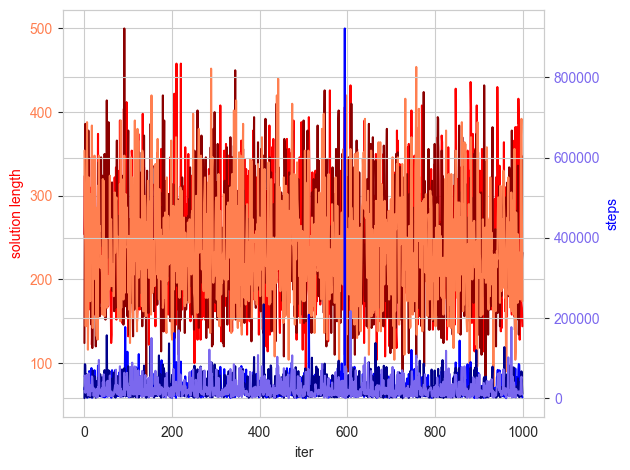

<Figure size 20000x20000 with 0 Axes>

In [48]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(200, 200))

ax1.set_xlabel('iter')
color = 'red'
ax1.set_ylabel('solution length', color=color)
ax1.plot(df1.index, df1["0"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
color = 'darkred'
ax1.plot(df2.index, df2["0"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
color = 'coral'
ax1.plot(df3.index, df3["0"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('steps', color=color)  # we already handled the x-label with ax1
ax2.plot(df1.index, df1["1"], color=color)
ax2.tick_params(axis='y', labelcolor=color)
color = 'darkblue'
ax2.plot(df2.index, df2["1"], color=color)
ax2.tick_params(axis='y', labelcolor=color)
color = 'mediumslateblue'
ax2.plot(df3.index, df3["1"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option 

<Figure size 20000x20000 with 0 Axes>

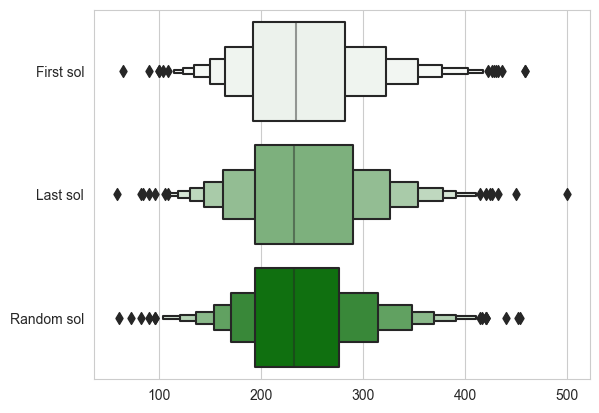

<Figure size 20000x20000 with 0 Axes>

In [49]:
sns.boxenplot(data=df_all[df_all.columns[0:3]], palette="light:g", orient="h")
plt.figure(figsize=(200, 200))

C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option 

<Figure size 20000x20000 with 0 Axes>

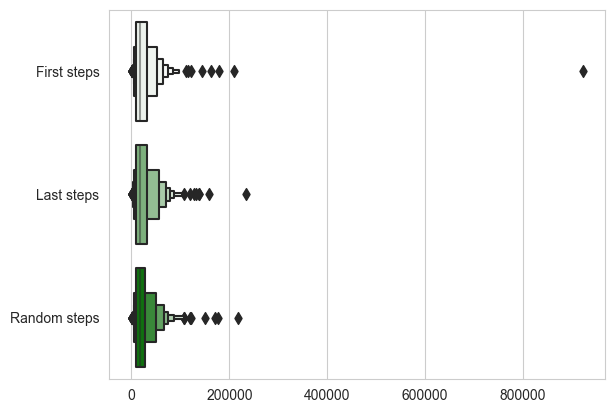

<Figure size 20000x20000 with 0 Axes>

In [50]:
sns.boxenplot(data=df_all[df_all.columns[3:6]], palette="light:g", orient="h")
plt.figure(figsize=(200, 200))

In [73]:
lq = df_all.quantile(.995)
lq

First sol          428.010
Last sol           420.020
Random sol         420.000
First steps     121033.800
Last steps      128012.115
Random steps    118860.150
Name: 0.995, dtype: float64

In [74]:
fq = df_all.quantile(.005)
fq

First sol        107.980
Last sol         105.950
Random sol        96.000
First steps     1585.970
Last steps      1757.900
Random steps    1867.735
Name: 0.005, dtype: float64

In [80]:
df_all_clean = df_all[~np.any(~(df_all < lq), axis=1)]
df_all_clean = df_all_clean[~np.any(~(df_all_clean > fq), axis=1)]
df_all_clean.describe()

,First sol,Last sol,Random sol,First steps,Last steps,Random steps
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,240.484144,241.145877,238.234672,23672.274841,24764.863636,22954.593023
std,63.565175,65.189134,60.180679,19794.638385,21683.382198,19546.299857
min,108.000000,108.000000,104.000000,1586.000000,1758.000000,1869.000000
25%,192.500000,194.000000,194.000000,9004.000000,9048.000000,9442.250000
50%,234.000000,232.000000,232.000000,17483.000000,17927.000000,17197.000000
75%,282.000000,288.000000,274.000000,31035.250000,30826.250000,27474.250000
max,428.000000,420.000000,416.000000,120918.000000,127995.000000,118846.000000


C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option 

<Figure size 20000x20000 with 0 Axes>

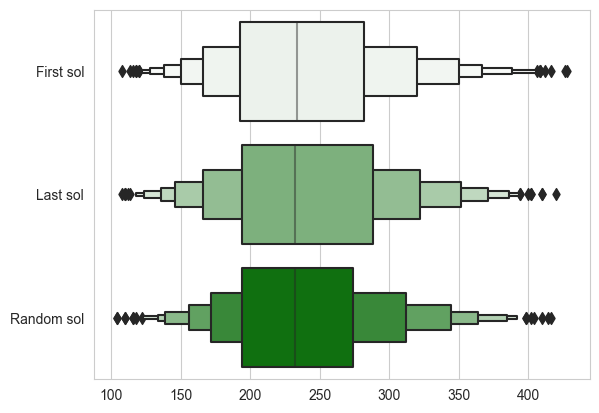

<Figure size 20000x20000 with 0 Axes>

In [78]:
sns.boxenplot(data=df_all_clean[df_all_clean.columns[0:3]], palette="light:g", orient="h")
plt.figure(figsize=(200, 200))

C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option 

<Figure size 20000x20000 with 0 Axes>

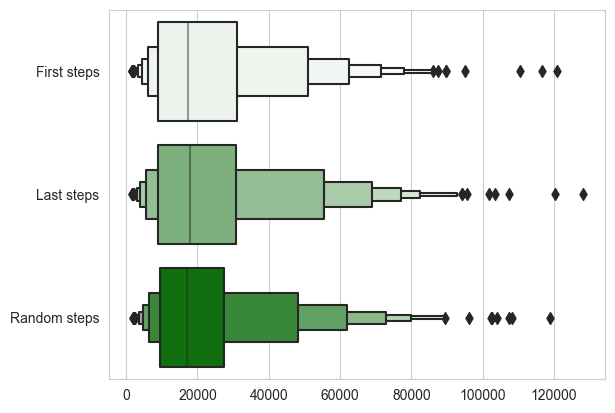

<Figure size 20000x20000 with 0 Axes>

In [79]:
sns.boxenplot(data=df_all_clean[df_all_clean.columns[3:6]], palette="light:g", orient="h")
plt.figure(figsize=(200, 200))